In [13]:
import pandas as pd
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn import linear_model
import sklearn as sk
import numpy as np
%matplotlib inline

In [14]:
dataset = datasets.load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24


In [15]:
X,y = shuffle(dataset.data, dataset.target)
X_train = X[0:200]
y_train = y[0:200]
X_valid = X[200:400]
y_valid = y[200:400]
X_test =X[400:]
y_test =y[400:]

In [26]:
model = sk.linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_
print (pd.DataFrame(list(zip(df.columns, model.coef_))))
#######
print ("Linear Score = ", model.score(X, y))
lasso = sk.linear_model.Lasso(alpha=1)
lasso.fit(X_train, y_train)
print ("Lasso Score = ", lasso.score(X, y))
ridge = sk.linear_model.RidgeCV()
ridge.fit(X_train, y_train)
print ("Ridge Score = ", ridge.score(X, y))
print ("--------------")
print ("Linear RMSE =", np.sqrt(sk.metrics.mean_squared_error(y_train, model.predict(X_train))))
print ("Lasso RMSE =", np.sqrt(sk.metrics.mean_squared_error(y_train, lasso.predict(X_train))))
print ("Ridge RMSE =", np.sqrt(sk.metrics.mean_squared_error(y_train, ridge.predict(X_train))))

          0          1
0      CRIM   0.034760
1        ZN   0.044317
2     INDUS   0.071624
3      CHAS   1.605167
4       NOX -21.807986
5        RM   3.560145
6       AGE   0.013361
7       DIS  -1.763604
8       RAD   0.264034
9       TAX  -0.013807
10  PTRATIO  -1.167623
11        B   0.016081
12    LSTAT  -0.556785
Linear Score =  -3.95824225001
Lasso Score =  -3.81615437618
Ridge Score =  -3.95051052025
--------------
Linear RMSE = 4.81002735964
Lasso RMSE = 5.25465099791
Ridge RMSE = 4.81358186957


In [17]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort(ascending=False)
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs.head()

,attribute pair,correlation
5,"(RAD, TAX)",0.910228
1,"(DIS, NOX)",-0.769230
0,"(INDUS, NOX)",0.763651
12,"(AGE, DIS)",-0.747881
19,"(AGE, NOX)",0.731470


C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


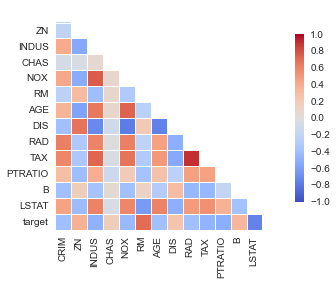

In [18]:
sns.corrplot(df, annot=False, sig_stars=False, diag_names=False)


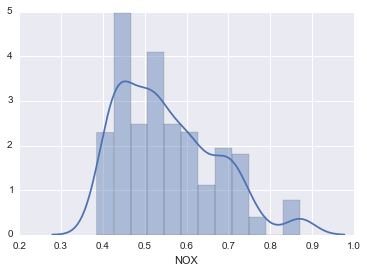

In [19]:
attr = df['NOX']
sns.distplot(attr)

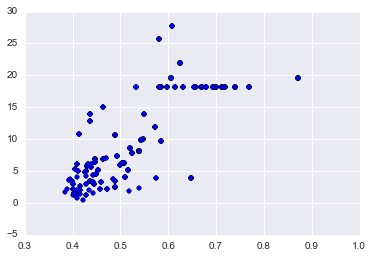

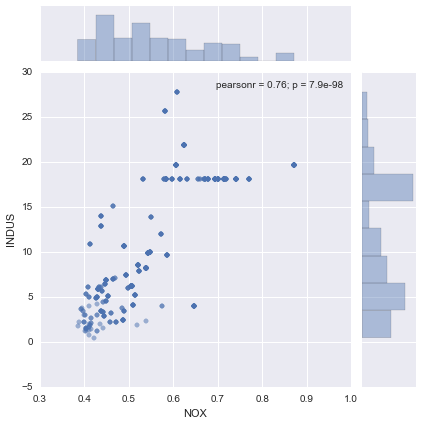

In [20]:
plt.scatter(df['NOX'], df['INDUS'])
x, y = df['NOX'], df['INDUS']
plt.scatter(x, y, alpha=0.5)

# or via jointplot (with histograms aside):
sns.jointplot(x, y, kind='scatter', joint_kws={'alpha':0.5})